<a href="https://colab.research.google.com/github/dzeke/ColoradoRiverCollaborate/blob/main/Powell10year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lake Powell Bythemetry: Compare 2017 Update to Pre 2017
May 12, 2024

## Overview
This is a Jupyter Notebook (.ipynb). This document reads bathymetry (elevation-storage-area) data for Lake Powell from the 2017 update and pre-2017. We then plot:

 + Area and Active Storage curves for 2017 and pre-2017.
 + Difference in active storage at each elevation.

Data Sources:
  + Pre 2017 - Export from Colorado River Simulation System (CRSS) model.
  + 2017 - Bradley, D., and Collins, K. (2022). "Lake Powell 2017 Area and Capacity Tables." ENV-2021-98, Reclamation. https://doi.org/10.5066/P9O3IPG3. From the tables on pages 17 and 19 at 1 foot increments. The tables were in pdf and were exported to Excel, cleaned, then saved as a csv file (Lake_Powell_Area_Capacity_Table_Report_FINAL.csv

Directions to Open, Edit, and Run (Windows)

    1. Download all the files into a new local folder on your machine or storage device (e.g., c:\users\myfolder).
    2. Open a command prompt (c:).
    3. Install the Juptyer server. At the command prompt type:

            pip install jupyter

    4. Navigate to the folder where this file is stored. For example:

            cd C:\users\myfolder

    5. Type the command:

            jupyter notebook

    6. A new webpage will open in your browser with the url http://localhost:8888/tree.
    7. Select this file from the list -- PowellBythemetryCompare.ipynb.
    8. This page will display.
    9. Select the first cell -- e.g., block [47] to run or edit. You should see the follow output:

      Elevation Volume2017 Area2017 VolumePre2017 AreaPre2017 DifferenceVolume  \

    10. Run each successive cell.

## Requested Citation
David E. Rosenberg (2021), “Lake Powell Bythemetry.” Utah State University. Logan, Utah.
https://github.com/dzeke/ColoradoRiverCollaborate/tree/main/LakePowellNewBathymetry.

### Pandas Cheat Sheet
Pandas cheat sheet at https://pandas.pydata.org/docs/user_guide/10min.html.
# Import Data

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

# Add this command on first run of cell
#!pip install plotnine
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

# Load the data from a csv file on Github
BathDataFileName = 'Lake_Powell_Area_Capacity_Table_Report_FINAL.csv'
# Move the Dataset into a Pandas Dataframe
dfBath = pd.read_csv(BathDataFileName)
# Read the number of rows
nRows = len(dfBath)

print()
#print(dfBath.dtypes)
#print(dfBath)

#Change the names of the columns
dfBath.columns = ['Elevation', 'Volume2017', 'Area2017', 'VolumePre2017', 'AreaPre2017', 'DifferenceVolume', 'DifferenceArea' ]
#Drop the first row which is text
dfBath.drop(labels=[0, 1, 2], axis=0, inplace = True)
dfBath.reset_index()

print(dfBath)

#Convert to float
lBathColNames = list(dfBath.columns)

for j in range(0,len(lBathColNames)):
    print(j)
    dfBath[lBathColNames[j]] = dfBath[lBathColNames[j]].astype(float)

print(dfBath.dtypes)
print(dfBath)


    Elevation Volume2017 Area2017 VolumePre2017 AreaPre2017 DifferenceVolume  \
3        3371      0.02     1.90          0.02        2.05             0.00    
4        3372      0.04     1.91          0.04        2.07             0.00    
5        3373      0.06     1.92          0.06        2.08             0.00    
6        3374      0.08     1.94          0.08        2.10             0.01    
7        3375      0.10     1.95          0.10        2.12             0.01    
..        ...        ...      ...           ...         ...              ...   
338      3706     24.28    16.24         25.30       16.57             1.03    
339      3707     24.44    16.31         25.47       16.65             1.03    
340      3708     24.60    16.38         25.63       16.73             1.03    
341      3709     24.77    16.45         25.80       16.81             1.04    
342      3710     24.93    16.52         25.97       16.89             1.04    

    DifferenceArea  
3           0.151

# Figure 1. Lake Powell Bathymetry Data

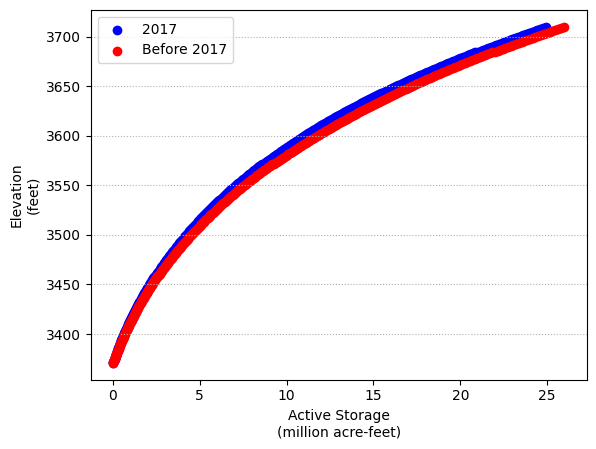

In [17]:
# Use matplotlib

import matplotlib.pyplot as plt

#plt.plot((dfBath.Volume2017, dfBath.Elevation)
plt.scatter(dfBath.Volume2017, dfBath.Elevation, color = "blue")
plt.scatter(dfBath.VolumePre2017, dfBath.Elevation, color = "red")
plt.xlabel('Active Storage\n(million acre-feet)')
plt.ylabel('Elevation\n(feet)')
plt.legend(["2017", "Before 2017"], loc="upper left")


#plt.xticks(np.arange(0, 20, 2))
#plt.yticks(np.arange(3370, 3710, 10))
plt.grid(axis = 'y', linestyle = "dotted")

plt.savefig('PowellElevationVolume.pdf', format='pdf', bbox_inches='tight')

# Figure 2. Difference between 2017 and Pre 2017 Volumes

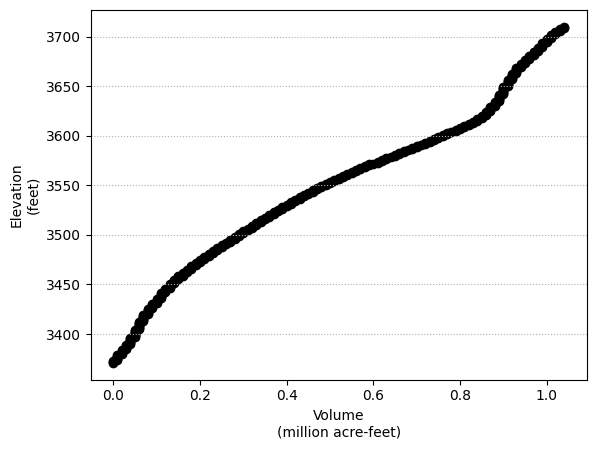

In [18]:
# Figure 2. Difference

plt.scatter(dfBath.DifferenceVolume, dfBath.Elevation, color = "black")
plt.xlabel('Volume\n(million acre-feet)')
plt.ylabel('Elevation\n(feet)')
plt.grid(axis = 'y', linestyle = "dotted")

plt.savefig('PowellElevationVolumeDifference.pdf', format='pdf', bbox_inches='tight')